In [6]:
# importing some important the packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Reading the data
df = pd.read_csv(r'C:\Users\ati_n\Downloads\movies.csv\movies.csv')

In [7]:
# Looking the data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [8]:
#Before I start Corelation Analysis checking for DQ issues
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [9]:
#Checking Data Types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#Changing data type of some columns to get rid of .0
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [10]:

# The error message indicates that there are NaN (Not a Number) values in the budget or gross columns, 
# which cannot be directly converted to int64. We need to handle these NaN values before converting the columns to integers.
#Approach 1: Fill NaN Values with a Default Value
# Fill NaN values with 0 or any other default value
# df['budget'] = df['budget'].fillna(0).astype('int64')
# df['gross'] = df['gross'].fillna(0).astype('int64')
# df
#In this case filling values with 0 would be misleading so we will go with other approach
# Approach 2: Drop Rows with NaN Values/ Dropping Rows with Missing Values
# Drop rows with NaN values in 'budget' and 'gross' columns
df = df.dropna(subset=['budget', 'gross'])

# Convert columns to int64
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [53]:
# Extracting year value from realsed column and creating new column
# Extract the year from the 'released' column
df['correct_year'] = df['released'].str.extract(r'(\d{4})', expand=False)

# Convert the extracted year to integer type
df['correct_year'] = df['correct_year'].astype(int)
# Deleting a single column by name
# df.drop('yearcorrect', axis=1, inplace=True)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,correct_country,year_match
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,United States,True
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,United States,True
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,United States,True
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,United States,True
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,United States,True


In [12]:
# Extract the country from the 'released' column
df['correct_country'] = df['released'].str.extract(r'\((.*?)\)', expand=False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,correct_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020,United States
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020,United States
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020,United States
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020,United States


In [13]:
# Compare 'correct_country' with 'country' and count matches and mismatches
total_rows = len(df)
non_matching_count = (df['correct_country'] != df['country']).sum()
matching_count = total_rows - non_matching_count

# Print the results
print(f"{non_matching_count} out of {total_rows} rows don't match.")
print(f"{matching_count} out of {total_rows} rows match.")

1186 out of 5436 rows don't match.
4250 out of 5436 rows match.


In [14]:
# Check if 'correct_year' exists in 'released' column
df['year_match'] = df.apply(lambda row: str(row['correct_year']) in row['released'], axis=1)

# Count matches and mismatches
total_rows = len(df)
non_matching_count = (~df['year_match']).sum()
matching_count = df['year_match'].sum()

# Print the results
print(f"{non_matching_count} out of {total_rows} rows don't match.")
print(f"{matching_count} out of {total_rows} rows match.")

0 out of 5436 rows don't match.
5436 out of 5436 rows match.


In [15]:
df.sort_values(by=['gross'], inplace=False, ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,correct_country,year_match
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,United States,True
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,United States,True
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,United States,True
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,United States,True
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,United States,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994,South Korea,True
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001,Canada,True
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982,United States,True
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993,Japan,True


In [16]:
# Select specific columns
selected_columns = ['name', 'year', 'rating', 'gross','company']

# Create a new DataFrame with selected columns and sort by 'gross' in ascending order
sorted_df = df[selected_columns].sort_values(by='gross', ascending=False)

# Display the sorted DataFrame
#sorted_df.head(10)  #Shows 10 results
sorted_df

,name,year,rating,gross,company
5445,Avatar,2009,PG-13,2847246203,Twentieth Century Fox
7445,Avengers: Endgame,2019,PG-13,2797501328,Marvel Studios
3045,Titanic,1997,PG-13,2201647264,Twentieth Century Fox
6663,Star Wars: Episode VII - The Force Awakens,2015,PG-13,2069521700,Lucasfilm
7244,Avengers: Infinity War,2018,PG-13,2048359754,Marvel Studios
...,...,...,...,...,...
2434,Philadelphia Experiment II,1993,PG-13,2970,Trimark Pictures
3681,Ginger Snaps,2000,Not Rated,2554,Copperheart Entertainment
272,Parasite,1982,R,2270,Embassy Pictures
2417,Madadayo,1993,NaN,596,DENTSU Music And Entertainment


In [17]:
#setting max rows
pd.set_option('display.max_rows', None)

In [52]:
# Drop any duplicates 

df['company'].drop_duplicates().sort_values(ascending=False).head(10) 
# drop_duplicates() removes the duplicates
# df['company'] = df.drop_duplicates() will drop duplicates from the entire df

7129                        thefyzz
5664                    micro_scope
4007                       i5 Films
6793                     i am OTHER
6420                           erbp
3776                 double A Films
3330    Zucker Brothers Productions
520                Zoetrope Studios
2213             Zeta Entertainment
3698        Zentropa Entertainments
Name: company, dtype: object

In [54]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,correct_country,year_match
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,United States,True
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,United States,True
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,United States,True
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,United States,True
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,United States,True


In [20]:
#Budget high correlation
#Company high correlation

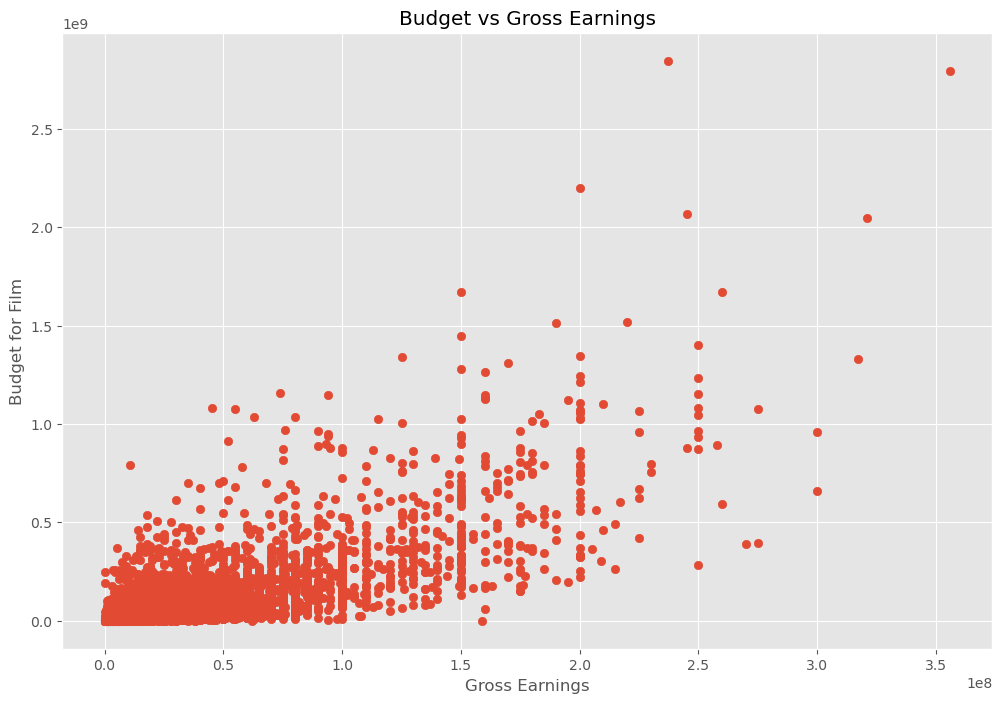

In [21]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

In [49]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,correct_country,year_match
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,United States,True
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,United States,True
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,United States,True
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,United States,True
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,United States,True


<Axes: xlabel='budget', ylabel='gross'>

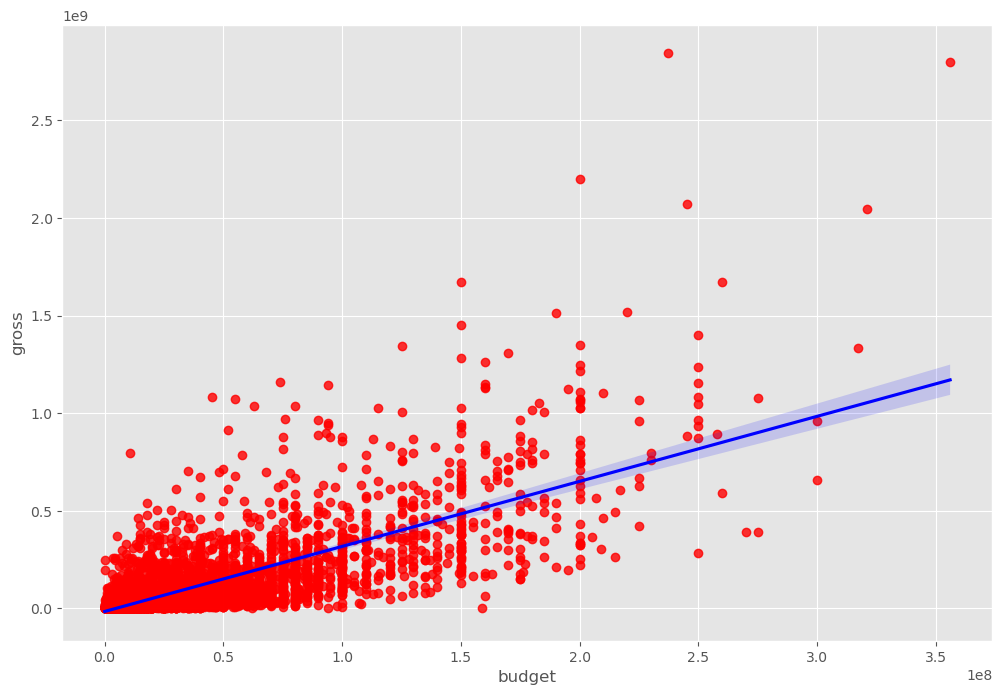

In [23]:
# Plot  budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color" : "blue"})

In [24]:
#Looking at correlation

In [25]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr(method='pearson')    #pearson,kendall, spearman

# Display the correlation matrix
correlation_matrix

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203,0.998641
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580,0.061029
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437,0.202883
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595,0.320245
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596,0.268626
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000,0.074432
correct_year,0.998641,0.061029,0.202883,0.320245,0.268626,0.074432,1.000000


In [26]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate Pearson correlation
pearson_corr = numeric_df.corr(method='pearson')
print("Pearson Correlation:\n", pearson_corr)

# Calculate Kendall correlation
kendall_corr = numeric_df.corr(method='kendall')
print("\nKendall Correlation:\n", kendall_corr)

# Calculate Spearman correlation
spearman_corr = numeric_df.corr(method='spearman')
print("\nSpearman Correlation:\n", spearman_corr)

Pearson Correlation:
                   year     score     votes    budget     gross   runtime  \
year          1.000000  0.055174  0.205758  0.327781  0.274264  0.074203   
score         0.055174  1.000000  0.473809  0.071792  0.222143  0.414580   
votes         0.205758  0.473809  1.000000  0.440021  0.614904  0.352437   
budget        0.327781  0.071792  0.440021  1.000000  0.740395  0.318595   
gross         0.274264  0.222143  0.614904  0.740395  1.000000  0.275596   
runtime       0.074203  0.414580  0.352437  0.318595  0.275596  1.000000   
correct_year  0.998641  0.061029  0.202883  0.320245  0.268626  0.074432   

              correct_year  
year              0.998641  
score             0.061029  
votes             0.202883  
budget            0.320245  
gross             0.268626  
runtime           0.074432  
correct_year      1.000000  

Kendall Correlation:
                   year     score     votes    budget     gross   runtime  \
year          1.000000  0.038391  0.29

In [27]:
#High correlation between budget and gross
#

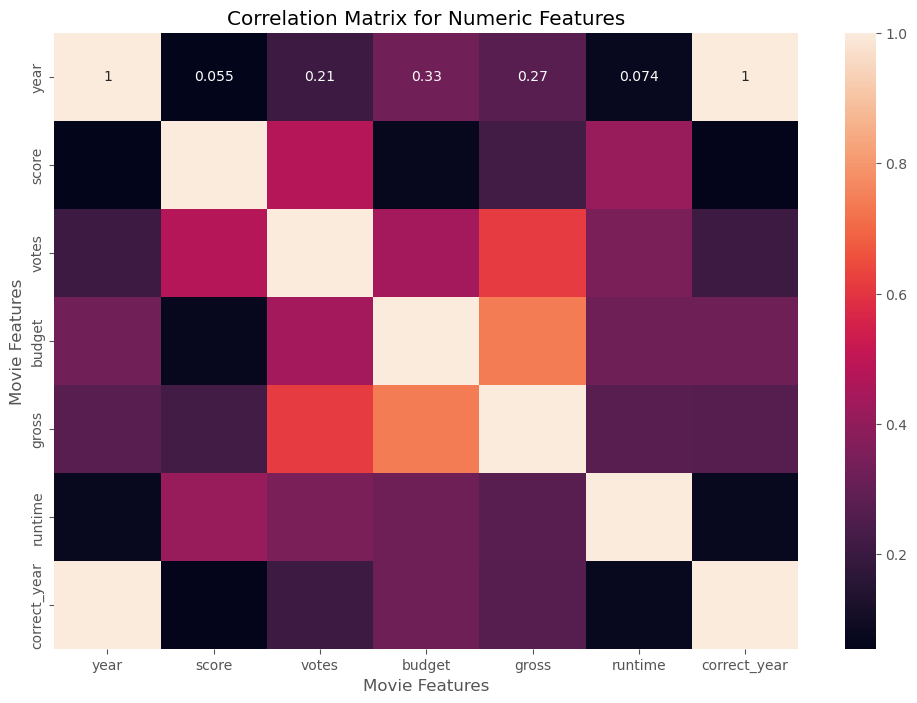

In [28]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr(method='pearson')   #pearson,kendall, spearman

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

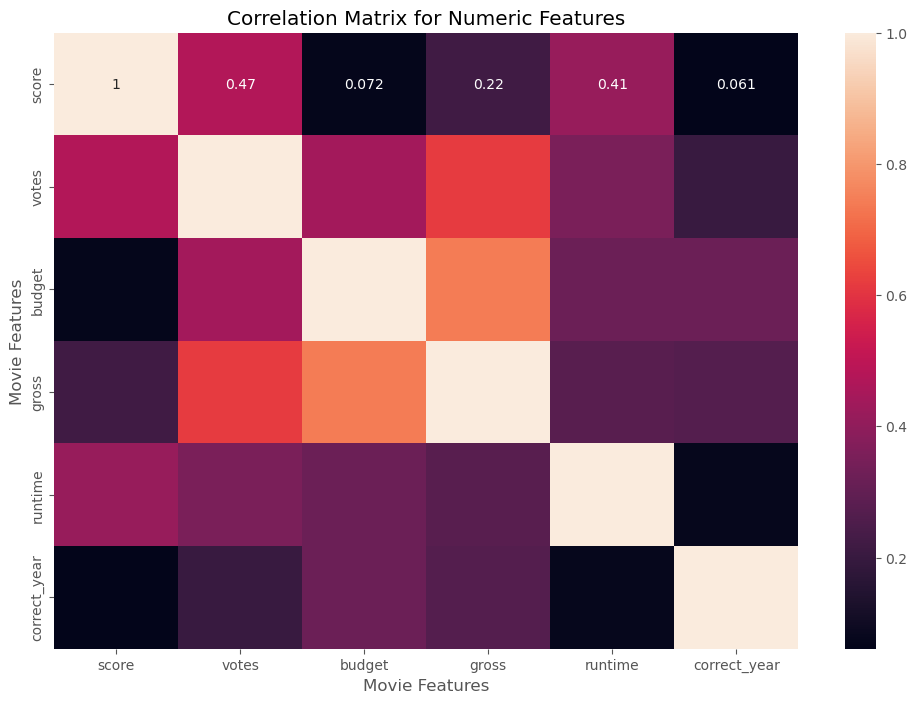

In [29]:
df.drop('year', axis=1, inplace=True)
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr(method='pearson')   #pearson,kendall, spearman

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

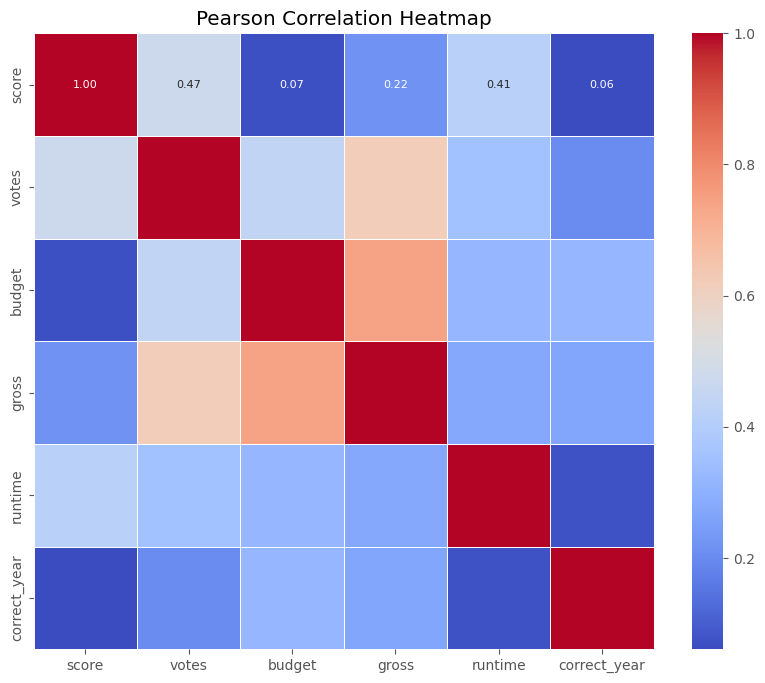

In [30]:

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate Pearson correlation
pearson_corr = numeric_df.corr(method='pearson')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, annot_kws={"size": 8})

# Set titles and labels
plt.title('Pearson Correlation Heatmap')
plt.show()

In [31]:

#Looks at company

df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,correct_country,year_match
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,United States,True
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,United States,True
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,United States,True
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,United States,True
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,United States,True


In [32]:
# Save a copy of the original DataFrame
df_original = df.copy()

In [39]:
# Create a separate DataFrame for numerical analysis
df_numerized = df.copy()

# Convert object columns to categorical codes
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category').cat.codes

# Display the first few rows of the numerized DataFrame to verify
df_numerized.head(10)


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,correct_country,year_match
5445,387,5,0,528,7.8,1100000.0,787,1265,1538,47,237000000,2847246203,1388,162.0,2009,47,True
7445,389,5,0,138,8.4,903000.0,106,515,1474,47,356000000,2797501328,987,181.0,2019,47,True
3045,4923,5,6,535,7.8,1100000.0,787,1265,1076,47,200000000,2201647264,1388,194.0,1997,47,True
6663,3656,5,0,530,7.8,876000.0,770,1810,357,47,245000000,2069521700,949,138.0,2015,47,True
7244,390,5,0,146,8.4,897000.0,106,515,1474,47,321000000,2048359754,987,149.0,2018,47,True
7480,4402,4,2,1130,6.9,222000.0,1014,1364,458,47,260000000,1670727580,1429,118.0,2019,47,True
6653,2125,5,0,1307,7.0,593000.0,337,2530,294,47,150000000,1670516444,1403,124.0,2015,47,True
6043,3891,5,0,1905,8.0,1300000.0,1062,1650,1474,47,220000000,1518815515,987,143.0,2012,47,True
6646,1545,5,0,166,7.1,370000.0,811,483,1792,47,190000000,1515341399,1403,137.0,2015,47,True
7494,1534,4,2,2059,6.8,148000.0,279,1386,1039,47,150000000,1450026933,1428,103.0,2019,47,True


C:\Users\ati_n\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


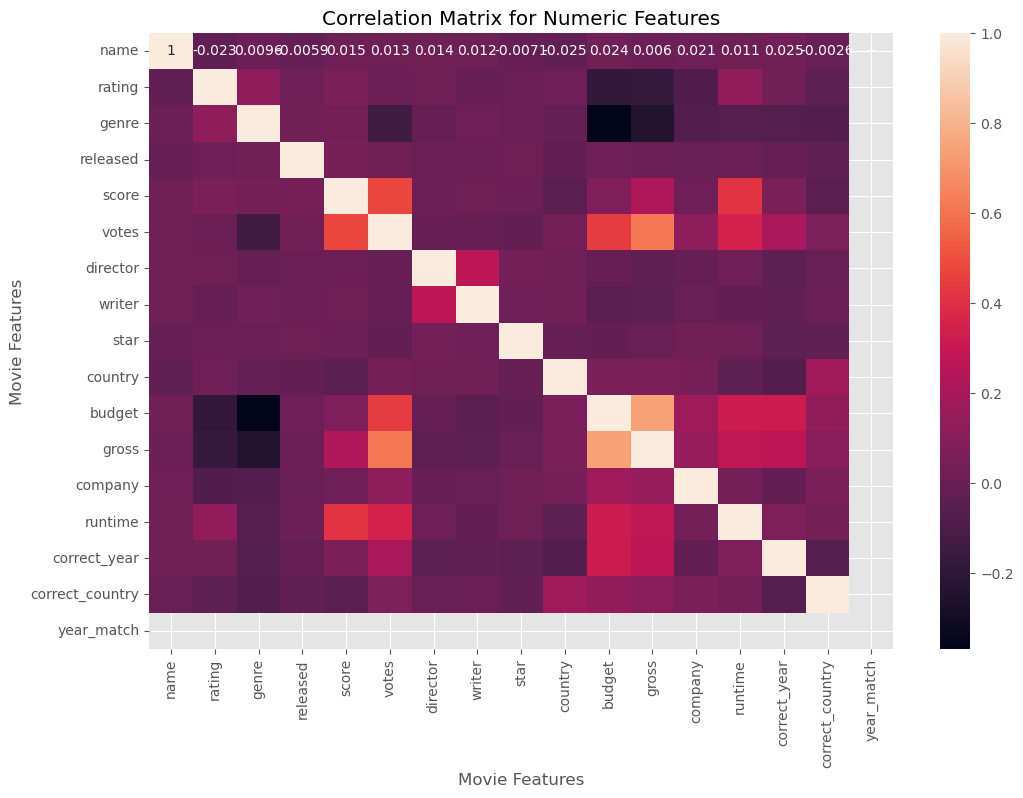

In [40]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [48]:
# Revert to the original DataFrame
df = df_original.copy()

# Display the first few rows of the reverted DataFrame to verify
df.head()


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,correct_country,year_match
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,United States,True
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,United States,True
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,United States,True
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,United States,True
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,United States,True


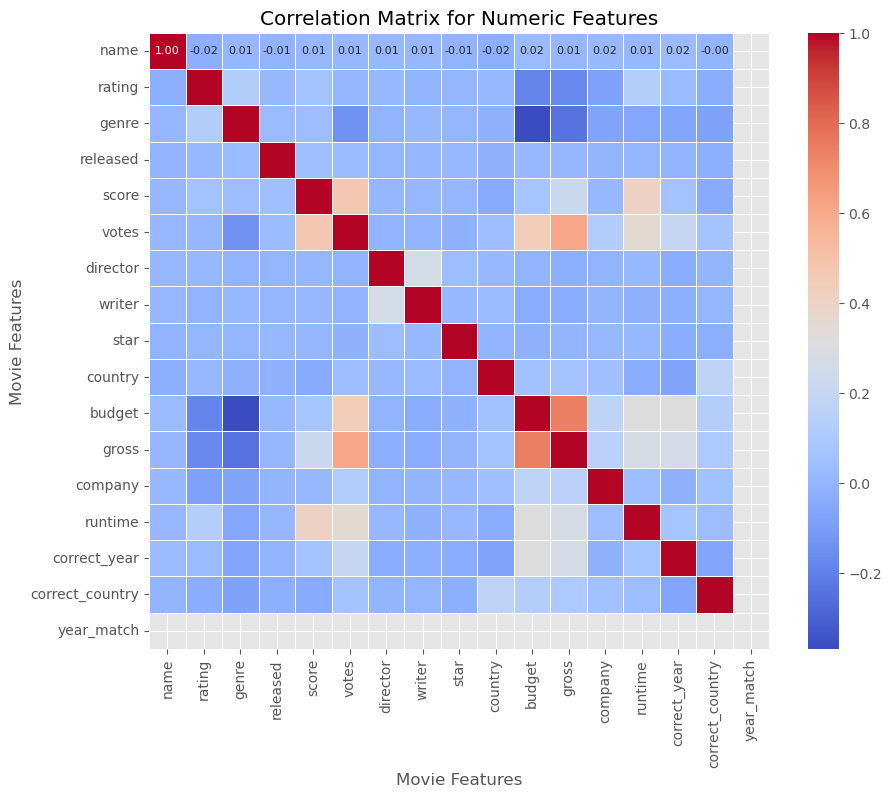

In [43]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Create a separate DataFrame for numerical analysis
df_numerized = df.copy()

# Convert object columns to categorical codes
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category').cat.codes

# Calculate Pearson correlation
correlation_matrix = df_numerized.corr(method='pearson')

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, annot_kws={"size": 8})

# Set titles and labels
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [44]:
df_numerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,correct_country,year_match
name,1.000000,-0.023013,0.009617,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800,0.024734,-0.002568,NaN
rating,-0.023013,1.000000,0.128102,0.018836,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239,0.023634,-0.037330,NaN
genre,0.009617,0.128102,1.000000,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186,-0.068848,-0.078424,NaN
released,-0.005896,0.018836,0.021712,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.008614,-0.002927,0.008619,-0.005625,-0.025458,NaN
score,0.014955,0.059550,0.034061,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580,0.061029,-0.045684,NaN
votes,0.012915,0.009255,-0.136457,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437,0.202883,0.067278,NaN
director,0.013699,0.014847,-0.009303,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082,-0.036281,-0.003815,NaN
writer,0.011602,-0.006923,0.017500,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672,-0.024397,0.001305,NaN
star,-0.007109,0.003737,0.002619,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439,-0.033168,-0.026289,NaN
country,-0.024555,0.020148,-0.010847,-0.017231,-0.044690,0.042146,0.011108,0.022153,-0.010135,1.000000,0.054372,0.060929,0.049559,-0.033554,-0.073732,0.169888,NaN


In [45]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name             name               1.000000
                 rating            -0.023013
                 genre              0.009617
                 released          -0.005896
                 score              0.014955
                 votes              0.012915
                 director           0.013699
                 writer             0.011602
                 star              -0.007109
                 country           -0.024555
                 budget             0.023698
                 gross              0.005966
                 company            0.021209
                 runtime            0.010800
                 correct_year       0.024734
                 correct_country   -0.002568
                 year_match              NaN
rating           name              -0.023013
                 rating             1.000000
                 genre              0.128102
                 released           0.018836
                 score              0.059550
          

In [46]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre            budget            -0.368900
budget           genre             -0.368900
genre            gross             -0.244380
gross            genre             -0.244380
budget           rating            -0.186892
rating           budget            -0.186892
                 gross             -0.168814
gross            rating            -0.168814
votes            genre             -0.136457
genre            votes             -0.136457
company          rating            -0.082189
rating           company           -0.082189
genre            correct_country   -0.078424
correct_country  genre             -0.078424
country          correct_year      -0.073732
correct_year     country           -0.073732
company          genre             -0.073293
genre            company           -0.073293
correct_year     genre             -0.068848
genre            correct_year      -0.068848
correct_country  correct_year      -0.065070
correct_year     correct_country   -0.065070
genre     

In [47]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes            gross              0.614904
gross            votes              0.614904
budget           gross              0.740395
gross            budget             0.740395
name             name               1.000000
runtime          runtime            1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
genre            genre              1.000000
rating           rating             1.000000
correct_year     correct_year       1.000000
correct_country  correct_country    1.000000
dtype: float64

In [ ]:
#Votes and budget have the highest correlation to gross earnings